In [1]:
import sklearn 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn import svm
from sklearn.dummy import DummyClassifier


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_predict
from sklearn.metrics import r2_score 


from sklearn.neural_network import MLPClassifier
from collections import Counter
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import OrdinalEncoder
from imblearn.over_sampling import SMOTE
# tuning parameters for decision tree
from sklearn.metrics import roc_curve, auc
from imblearn.under_sampling import TomekLinks 
from IPython.display import display
from statsmodels.tsa.seasonal import seasonal_decompose

### Import data

In [2]:
train_cli = pd.read_csv("train_clinical_data.csv")

In [ ]:
# read data 
train_pep = pd.read_csv("train_pep.csv")
train_pro = pd.read_csv("train_pro.csv")

### Start Time series analysis 

In [3]:
train_cli.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [4]:
# sum them up!
df = train_cli
group_variables = ['visit_month']
outcome_variable = ['updrs_1','updrs_2', 'updrs_3', 'updrs_4']
base = df.groupby(group_variables)[outcome_variable].sum().reset_index()

In [5]:
train_cli.describe()

,patient_id,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
count,2615.000000,2615.000000,2614.000000,2613.00000,2590.000000,1577.000000
mean,32651.743786,31.190822,7.110559,6.74359,19.421236,1.861763
std,18535.758700,25.199053,5.525955,6.32323,15.000289,3.022112
min,55.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,16574.000000,10.500000,3.000000,1.00000,6.000000,0.000000
50%,29417.000000,24.000000,6.000000,5.00000,19.000000,0.000000
75%,50611.000000,48.000000,10.000000,10.00000,29.000000,3.000000
max,65043.000000,108.000000,33.000000,40.00000,86.000000,20.000000


In [6]:
base

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,0,1382.0,1101.0,3411.0,129.0
1,3,634.0,763.0,2335.0,1.0
2,6,1365.0,1337.0,3872.0,150.0
3,9,602.0,706.0,2027.0,21.0
4,12,1512.0,1293.0,3896.0,174.0
5,18,1365.0,1284.0,3518.0,167.0
6,24,1621.0,1375.0,3941.0,257.0
7,30,1424.0,1323.0,3756.0,256.0
8,36,1657.0,1408.0,4103.0,286.0
9,42,1276.0,1281.0,3499.0,256.0


In [7]:
base.set_index('visit_month', inplace=True)
display(base)

,updrs_1,updrs_2,updrs_3,updrs_4
visit_month,,,,
0,1382.0,1101.0,3411.0,129.0
3,634.0,763.0,2335.0,1.0
6,1365.0,1337.0,3872.0,150.0
9,602.0,706.0,2027.0,21.0
12,1512.0,1293.0,3896.0,174.0
18,1365.0,1284.0,3518.0,167.0
24,1621.0,1375.0,3941.0,257.0
30,1424.0,1323.0,3756.0,256.0
36,1657.0,1408.0,4103.0,286.0


### Updrs_3 

<AxesSubplot:title={'center':'Monthly scores'}, xlabel='visit_month'>

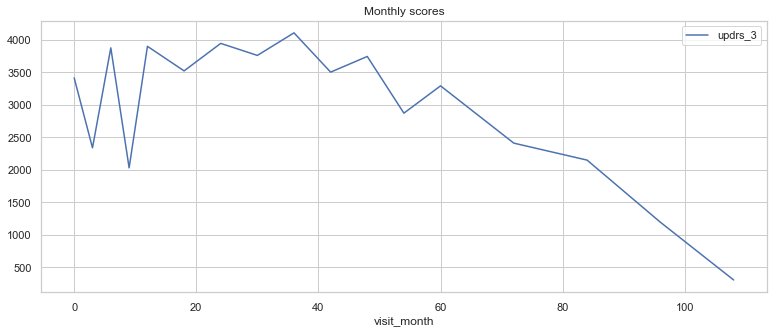

In [8]:
plotsize = (13, 5)
base1 = base[['updrs_3']]
base1.plot(figsize=plotsize, title='Monthly scores')

## SARIMAX model

In [97]:
test

,visit_month,updrs_1
13,72,778.0
14,84,773.0
15,96,447.0
16,108,113.0


Optimization terminated successfully.
         Current function value: -0.000000
         Iterations: 19
         Function evaluations: 94


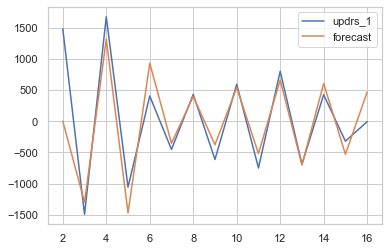

In [131]:
df = base.iloc[:,[1,2]]

# convert to stationary series if necessary
df_diff = df.diff().diff().dropna()
df = df_diff

train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

# specify the order of the SARIMA model
order = (1, 0, 0)
seasonal_order = (1, 0, 0, 12)

# create and fit the SARIMAX model
model = SARIMAX(train.values[:,1], order=order, seasonal_order=seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results = model.fit(method='nm')

# use the fitted model to make predictions on the testing set
predictions = results.predict(start = 0, end= 14)  


pd.plotting.register_matplotlib_converters()
df['forecast'] = results.predict(start = 0, end= 14)  
df[:][['updrs_1', 'forecast']].plot();



In [ ]:
new_df = pd.DataFrame(
visit_month = )
forecast = results.forecast(steps=len(new_df))

<AxesSubplot:xlabel='visit_month', ylabel='updrs_3'>

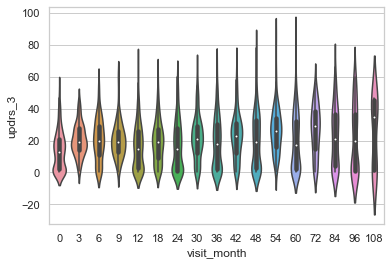

In [40]:
sns.violinplot(x=df.visit_month, y=df.updrs_3)

In [41]:
# check for stationarility 
# define Dickey-Fuller Test (DFT) function
# Null is that unit root is present, rejection means likely stationary
import statsmodels.tsa.stattools as ts
def dftest(timeseries):
    dftest = ts.adfuller(timeseries,)
    dfoutput = pd.Series(dftest[0:4], 
                         index=['Test Statistic','p-value','Lags Used','Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.grid()
    plt.show(block=False)

Test Statistic         -19.737333
p-value                  0.000000
Lags Used                0.000000
Observations Used       14.000000
Critical Value (1%)     -4.012034
Critical Value (5%)     -3.104184
Critical Value (10%)    -2.690987
dtype: float64


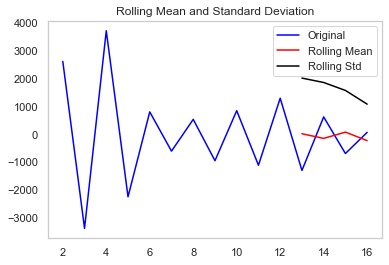

Test Statistic           3.480322
p-value                  1.000000
Lags Used                1.000000
Observations Used       15.000000
Critical Value (1%)     -3.964443
Critical Value (5%)     -3.084908
Critical Value (10%)    -2.681814
dtype: float64


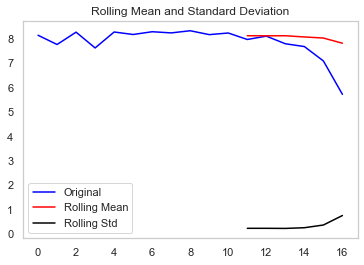

In [135]:
# if the p-value is less than the critical value, the series is stationary 
dftest(base.updrs_3.diff().diff().dropna())
dftest(np.log(base.updrs_3))

In [63]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
# fit SARIMA monthly based on helper plots
sar = sm.tsa.statespace.SARIMAX(base.updrs_3, 
                                order=(1,0,0), 
                                seasonal_order=(0,1,1,12), 
                                trend='c').fit()
sar.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.52512D+00    |proj g|=  5.02124D-02

At iterate    5    f=  2.51768D+00    |proj g|=  3.04243D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6      8      1     0     0   3.042D-05   2.518D+00
  F =   2.5176847873384895     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                              updrs_3   No. Observations:                   17
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                 -42.801
Date:                              Sat, 04 Mar 2023   AIC                             93.601
Time:                                      11:23:46   BIC                             92.039
Sample:                                           0   HQIC                            89.408
                                               - 17                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1409.2678   3883.799     -0.363      0.717   -9021.374    6202.839
ar.L1          0.4190      0.954      0.439      0.661      -1.451       2.290
ma.S.L12       0.0197      1.297      0.015      0.988      -2.523       2.563
sigma2      1.821e+06   3.01e+06      0.604      0.546   -4.09e+06    7.73e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.61   Jarque-Bera (JB):                 0.52
Prob(Q):                              0.20   Prob(JB):                         0.77
Heteroskedasticity (H):               2.14   Skew:                            -0.61
Prob(H) (two-sided):                  0.64   Kurtosis:                         1.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

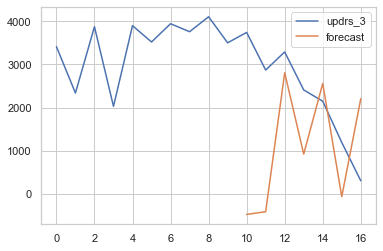

In [123]:
pd.plotting.register_matplotlib_converters()
#use model.predict() start and end in relation to series
base['forecast'] = sar.predict(start = 10, end= 16)  
base[:][['updrs_3', 'forecast']].plot();

In [87]:
display(base)

,index,visit_month,updrs_1,updrs_2,updrs_3,updrs_4,forecast
0,0,0,1382.0,1101.0,3411.0,129.0,-2425.690960
1,1,3,634.0,763.0,2335.0,1.0,-741.944742
2,2,6,1365.0,1337.0,3872.0,150.0,-868.988608
3,3,9,602.0,706.0,2027.0,21.0,-463.031273
4,4,12,1512.0,1293.0,3896.0,174.0,-915.027735
5,5,18,1365.0,1284.0,3518.0,167.0,-462.855805
6,6,24,1621.0,1375.0,3941.0,257.0,-502.603103
7,7,30,1424.0,1323.0,3756.0,256.0,-390.829376
8,8,36,1657.0,1408.0,4103.0,286.0,-424.739121
9,9,42,1276.0,1281.0,3499.0,256.0,-330.627441


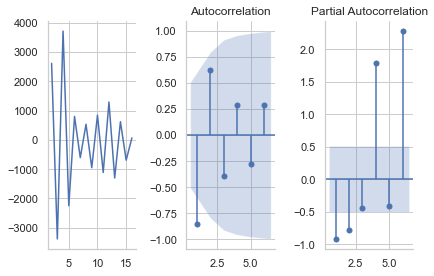

In [52]:
# define helper plot function for visualization
def plots(data, lags=None):
    layout = (1, 3)
    raw  = plt.subplot2grid(layout, (0, 0))
    acf  = plt.subplot2grid(layout, (0, 1))
    pacf = plt.subplot2grid(layout, (0, 2))
    
    raw.plot(data)
    sm.tsa.graphics.plot_acf(data, lags=lags, ax=acf, zero=False)
    sm.tsa.graphics.plot_pacf(data, lags=lags, ax=pacf, zero = False)
    sns.despine()
    plt.tight_layout()
plots(base.updrs_3.diff().diff().dropna(), lags=6);

In [11]:
base = base.reset_index()
base['updrs_3']

0     3411.0
1     2335.0
2     3872.0
3     2027.0
4     3896.0
5     3518.0
6     3941.0
7     3756.0
8     4103.0
9     3499.0
10    3740.0
11    2868.0
12    3288.0
13    2407.0
14    2146.0
15    1191.0
16     303.0
Name: updrs_3, dtype: float64

Text(0.5, 1.0, 'Diff')

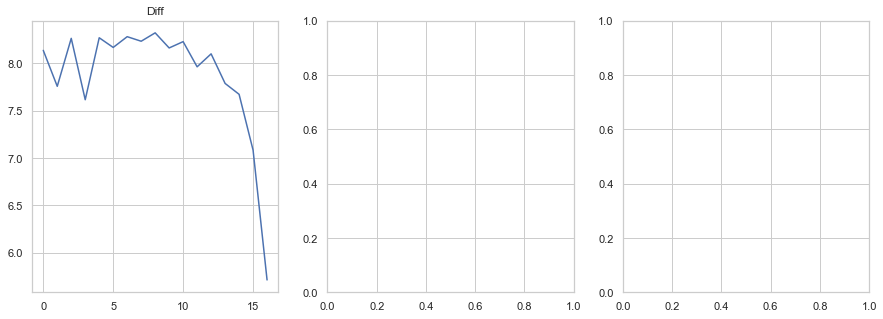

In [38]:
fig,axes = plt.subplots(1,3,figsize = (15,5))
axes[0].plot(np.log(base.updrs_3))
axes[0].set_title('Log')

In [23]:
from sklearn.preprocessing import MinMaxScaler
# create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(-1, 1))

# fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(base[['updrs_3']])
scaled_data = scaled_data.flatten()


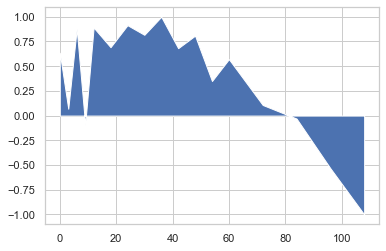

In [24]:
plt.fill_between(base['visit_month'],scaled_data)

### AR(1)

In [25]:
import statsmodels.api as sm
# using ARMA model from statsmodel package
model = sm.tsa.ARMA(scaled_data, (1, 0)).fit(trend='nc', disp=0)
model.params

array([0.73436802])

## AR(2) 

In [26]:
# Again running statsmodel ARMA to predict parameters for generated data
model = sm.tsa.ARMA(scaled_data, (2, 0)).fit(trend='nc', disp=0)
model.params

array([0.28746003, 0.59940119])

## MA Models

In [27]:
# find model params for generated sample 
model = sm.tsa.ARMA(scaled_data, (0, 1)).fit(trend='nc', disp=0)
model.params

array([0.36516449])

## Deciding models - The Autocorrelation Function

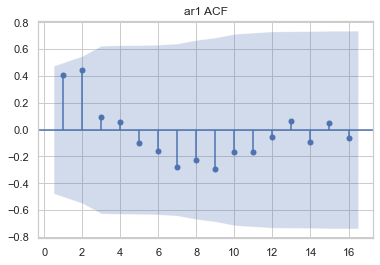

In [30]:
fig = sm.tsa.graphics.plot_acf(scaled_data, lags=range(1,17), alpha=0.05,title = 'ar1 ACF')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf()

## Deciding models - PCF model 

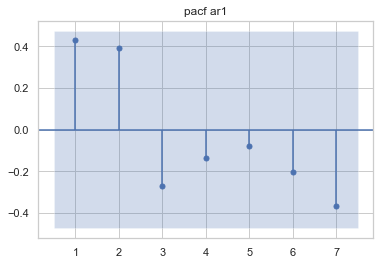

In [33]:
from statsmodels.graphics.tsaplots import plot_pacf

fig = sm.tsa.graphics.plot_pacf(scaled_data, lags=range(1,8), alpha=0.05, title = 'pacf ar1')

It is probably a AR(2) model! 

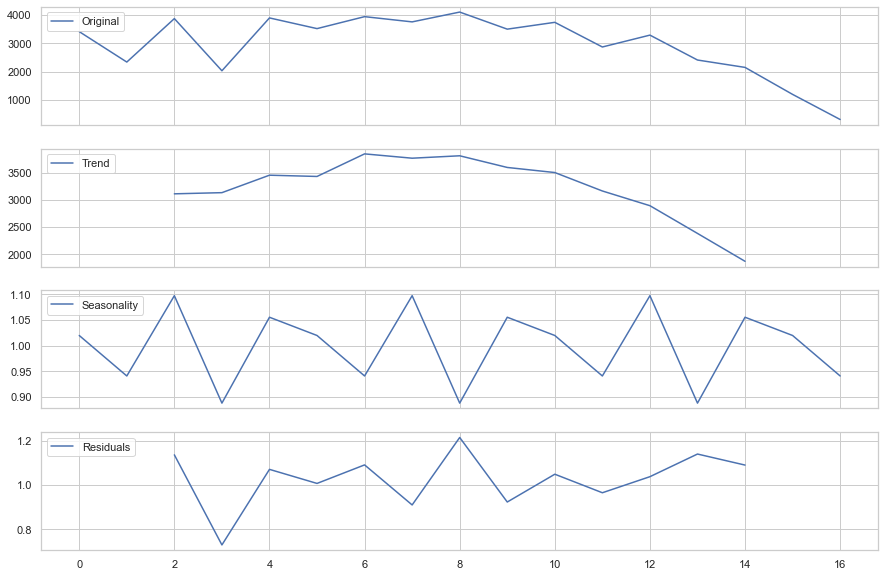

In [158]:
additive = base1['updrs_3'].values
ss_decomposition = seasonal_decompose(x=additive, model='multiplicative', period=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

In [159]:
# dip into the stationarity 
# each chunk contains values for each visit month 
group_variables = ['visit_month']
outcome_variable = ['updrs_1','updrs_2', 'updrs_3', 'updrs_4']
mean = df.groupby(group_variables)[outcome_variable].mean().reset_index()
var = df.groupby(group_variables)[outcome_variable].var().reset_index()

In [160]:
display(mean)
display(var)

,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,0,5.572581,4.439516,13.754032,2.047619
1,3,5.513043,6.634783,20.482456,0.142857
2,6,7.109375,6.963542,20.272251,2.307692
3,9,6.080808,7.204082,20.474747,0.488372
4,12,6.222222,5.320988,16.165975,1.308271
5,18,7.299465,6.866310,19.016216,1.218978
6,24,6.670782,5.658436,16.489540,1.658065
7,30,8.231214,7.647399,21.710983,1.753425
8,36,7.331858,6.230088,18.316964,1.765432
9,42,8.339869,8.372549,22.720779,1.868613


,visit_month,updrs_1,updrs_2,updrs_3,updrs_4
0,0,21.338840,24.700780,143.319822,10.465438
1,3,21.497635,27.532113,95.791725,0.142857
2,6,32.998446,35.658350,173.472858,15.903846
3,9,23.136261,30.164107,123.945784,1.922481
4,12,24.793388,29.880012,205.847337,7.002734
5,18,27.049623,33.643321,170.722562,6.613461
6,24,27.196953,32.250621,232.150100,9.148555
7,30,28.236927,36.659833,192.892728,10.049126
8,36,31.804936,39.422380,257.338545,10.354574
9,42,32.423203,44.524768,199.614337,8.864964


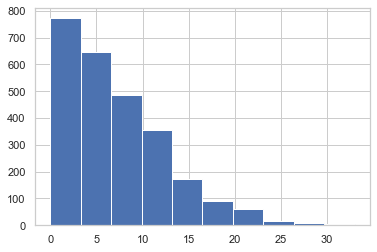

In [146]:
trend = np.array(df['updrs_1'])
pd.Series(trend).hist();

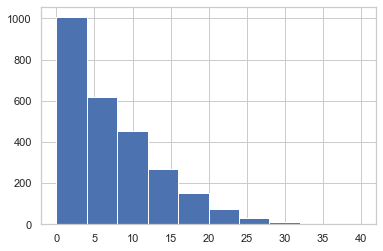

In [147]:
trend = np.array(df['updrs_2'])
pd.Series(trend).hist();

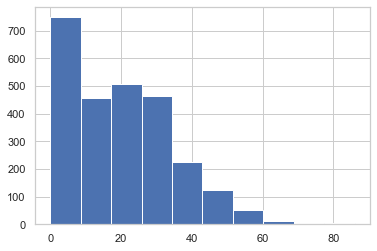

In [148]:
trend = np.array(df['updrs_3'])
pd.Series(trend).hist();

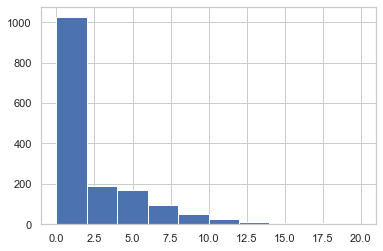

In [150]:
trend = np.array(df['updrs_4'])
pd.Series(trend).hist();

<AxesSubplot:title={'center':'Monthly scores'}, xlabel='visit_month'>

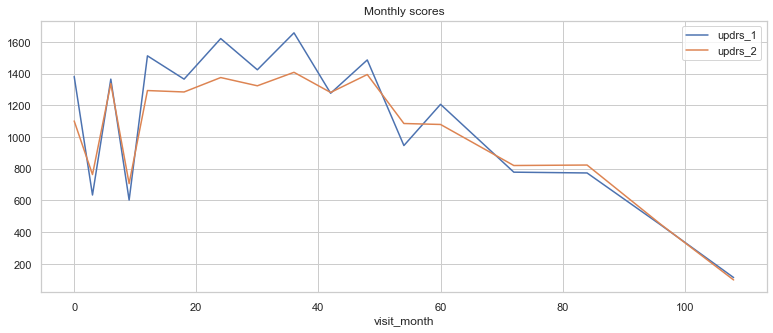

In [151]:
# updrs_1 is independent of months
new = base[['updrs_1', 'updrs_2']]
new.plot(figsize=plotsize, title='Monthly scores')

### Updrs_2

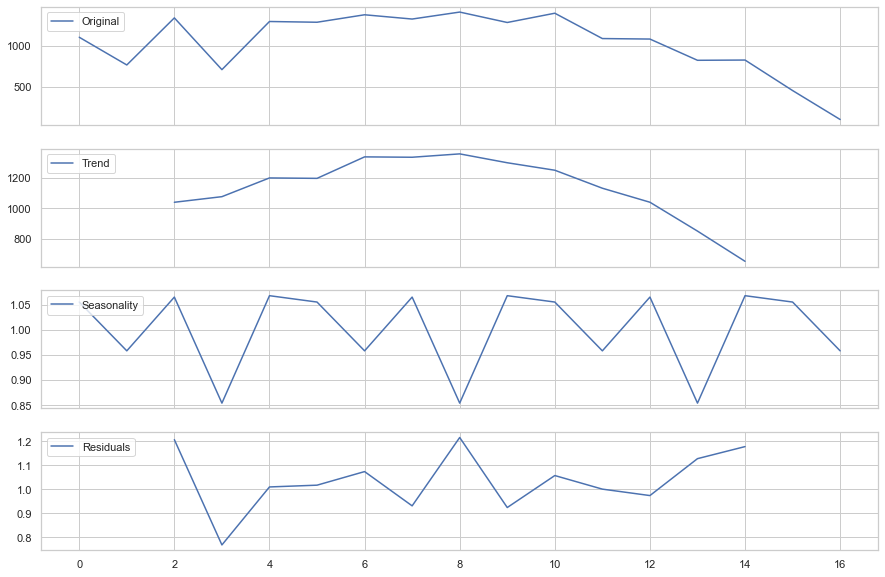

In [155]:
additive = new['updrs_2'].values
ss_decomposition = seasonal_decompose(x=additive, model='multiplicative', period=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

In [101]:
# test if it is stationary 
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(new['updrs_2'].values)
print("ADF before: ", adf)
print("p-value before: ", pvalue)
print(estimated_residual)
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(estimated_residual[2:-2])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF before:  1.119704291948169
p-value before:  0.9953813314460752
[          nan           nan  225.59333333 -216.40666667   49.52666667
    7.39333333   79.89333333  -82.00666667  205.39333333  -62.27333333
   66.59333333   -5.90666667  -32.60666667  121.99333333  123.72666667
           nan           nan]
ADF:  -6.991164034861251
p-value:  7.738462100160004e-10


### Updrs_1

In [115]:
len(np.unique(df['visit_month'].values))

17

In [118]:
df['updrs_1'] = df['updrs_1'].fillna(0)

In [121]:
df['updrs_1'].values

array([10., 10.,  8., ...,  6.,  3.,  7.])

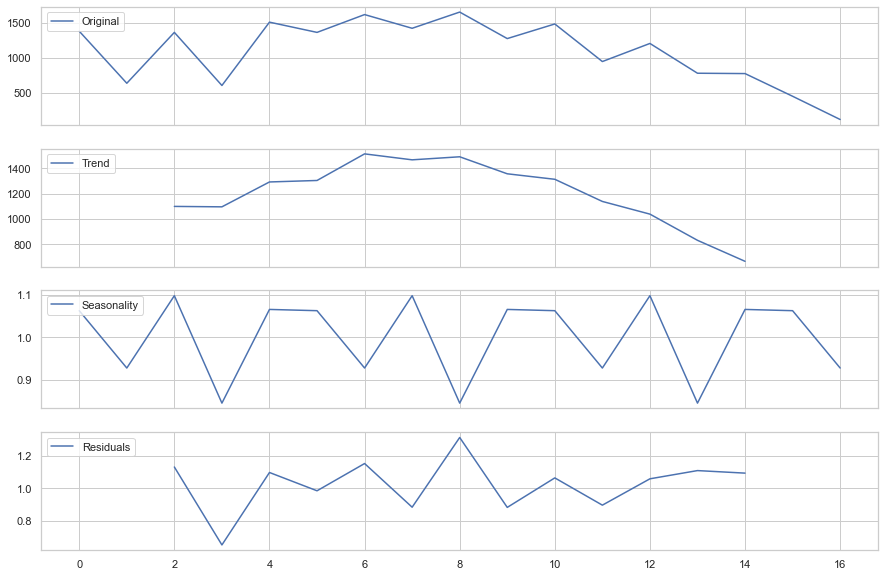

In [156]:
additive = new['updrs_1'].values

from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='multiplicative', period=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

In [123]:
# we will need to do it for every patient 


1


In [104]:
# test if it is stationary 
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(new['updrs_1'].values)
print("ADF before: ", adf)
print("p-value before: ", pvalue)
print(estimated_residual)

adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(estimated_residual[2:-2])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)
print("critical values: ", critical_values_)

ADF before:  0.8862779782750518
p-value before:  0.9929086117058815
[       nan        nan 1.13100955 0.65005005 1.09716758 0.98425941
 1.1525232  0.88295339 1.31317683 0.88172787 1.06384467 0.89558088
 1.05819317 1.10892924 1.09326067        nan        nan]
ADF:  -6.072187503142366
p-value:  1.1438185749214509e-07
critical values:  {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}


### Updrs_4

<AxesSubplot:title={'center':'Monthly scores'}, xlabel='visit_month'>

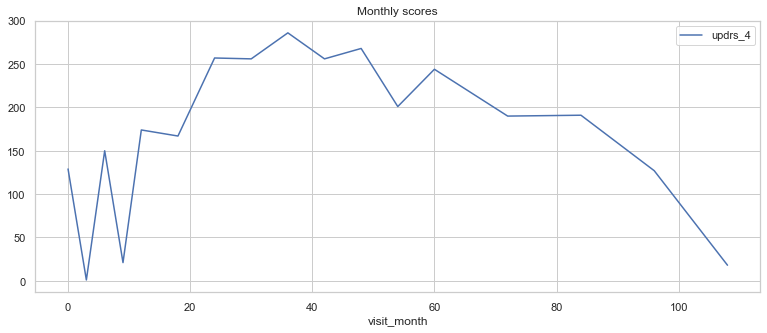

In [37]:
base4 = base[['updrs_4']]
base4.plot(figsize=plotsize, title='Monthly scores')

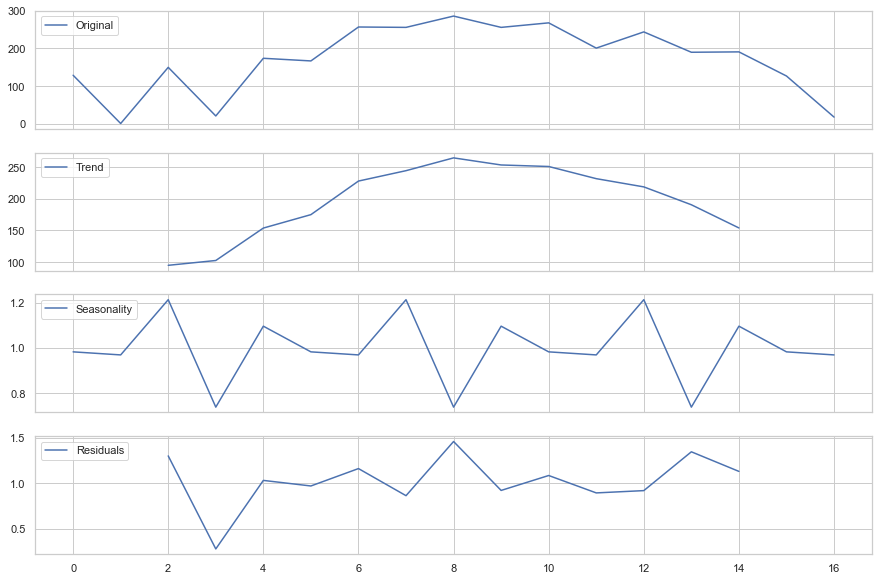

In [157]:
additive = base4['updrs_4'].values

from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=additive, model='multiplicative', period=5)
estimated_trend = ss_decomposition.trend
estimated_seasonal = ss_decomposition.seasonal
estimated_residual = ss_decomposition.resid
fig, axes = plt.subplots(4, 1, sharex=True, sharey=False)
fig.set_figheight(10)
fig.set_figwidth(15)

axes[0].plot(additive, label='Original')
axes[0].legend(loc='upper left');

axes[1].plot(estimated_trend, label='Trend')
axes[1].legend(loc='upper left');

axes[2].plot(estimated_seasonal, label='Seasonality')
axes[2].legend(loc='upper left');

axes[3].plot(estimated_residual, label='Residuals')
axes[3].legend(loc='upper left');

In [167]:
additive

array([3411., 2335., 3872., 2027., 3896., 3518., 3941., 3756., 4103.,
       3499., 3740., 2868., 3288., 2407., 2146., 1191.,  303.])

In [106]:
from statsmodels.tsa.stattools import adfuller
# Remove Trend & Seasonality with Statsmodels
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(additive)
print("ADF before: ", adf)
print("p-value before: ", pvalue)

# we used the residues as transformed values 
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(estimated_residual[2:-2])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)

ADF before:  0.8890227471970746
p-value before:  0.9929453849651979
ADF:  -5.28619431217312
p-value:  5.847968957320151e-06
